In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
from traceback import format_exc

from functions import getSCFCycleData, getMolname, getThresholds, getMult

# Get completed molecule indeces
data = 'data.csv'
df = pd.read_csv(data)
molecules = df.loc[df.Completed]['Index'].unique().tolist()
functionals = df.Functional.unique().tolist()

/var/folders/_3/qb1mrtrj3h16_5wxbgrsdx0m0000gp/T/ipykernel_63346/1215738696.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(ncols=2, dpi=100, figsize=(8, 4), sharey=True)


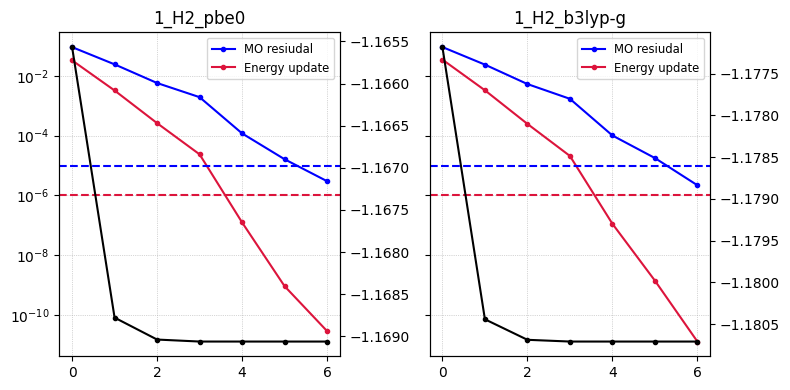

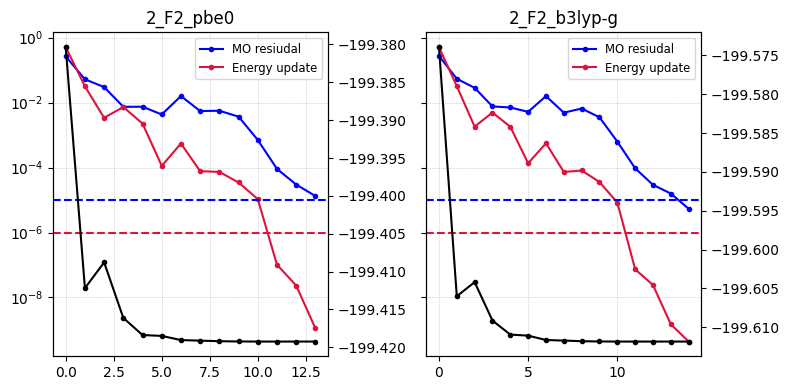

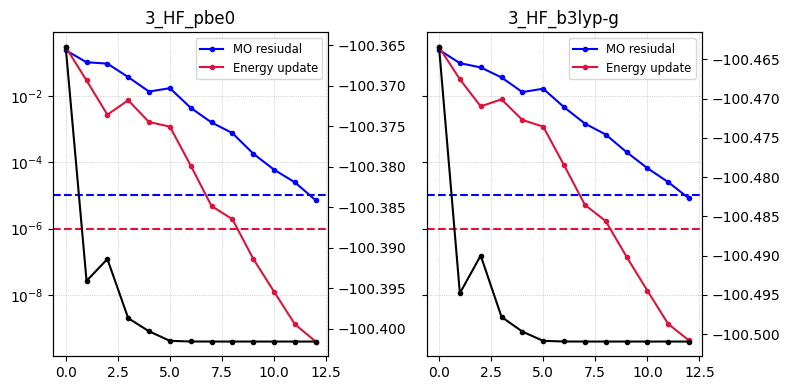

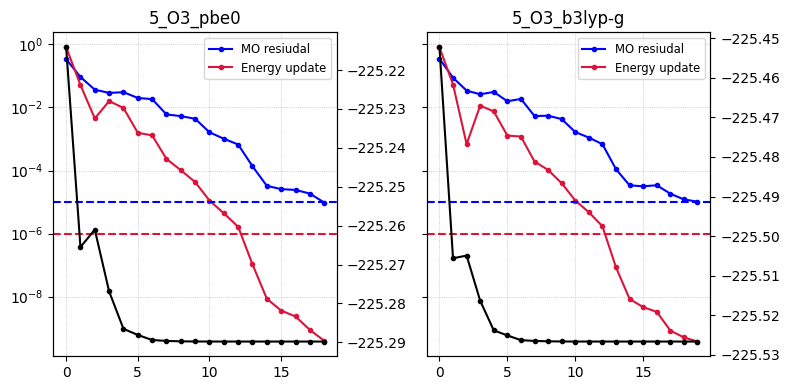

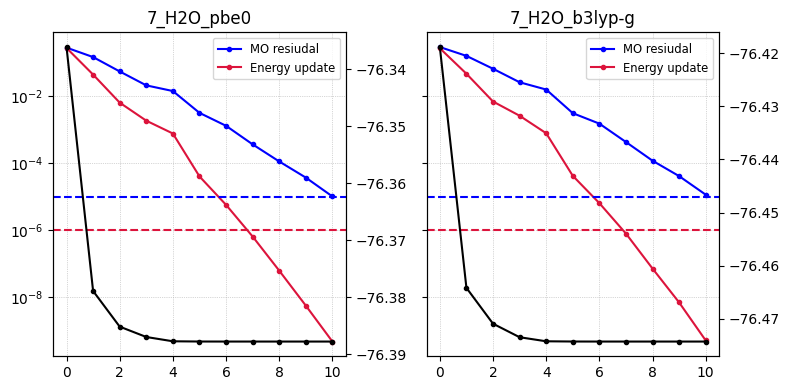

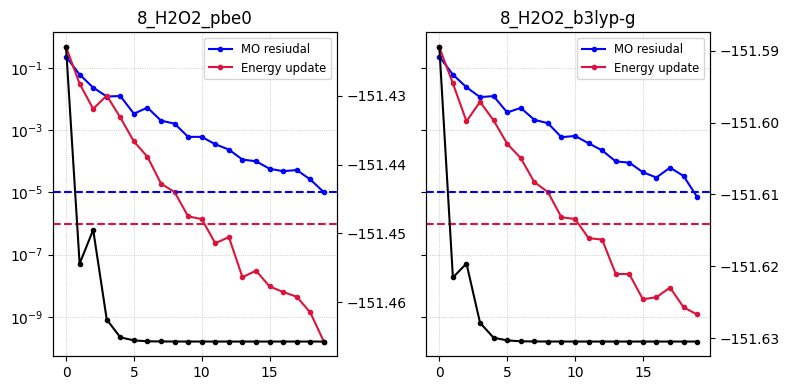

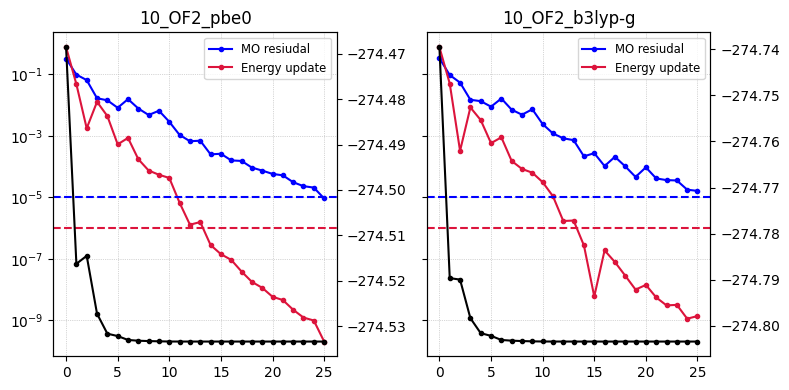

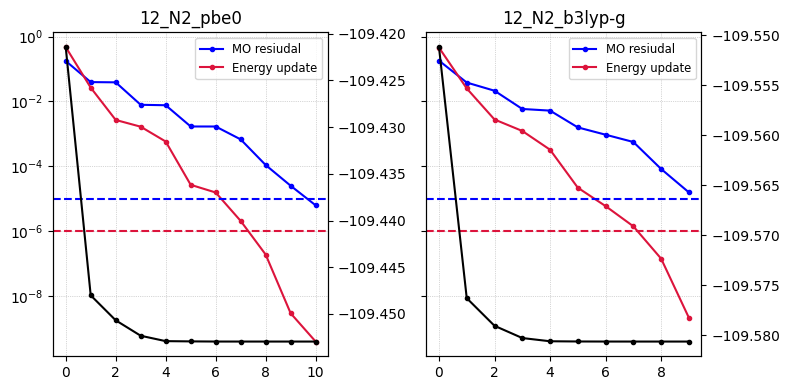

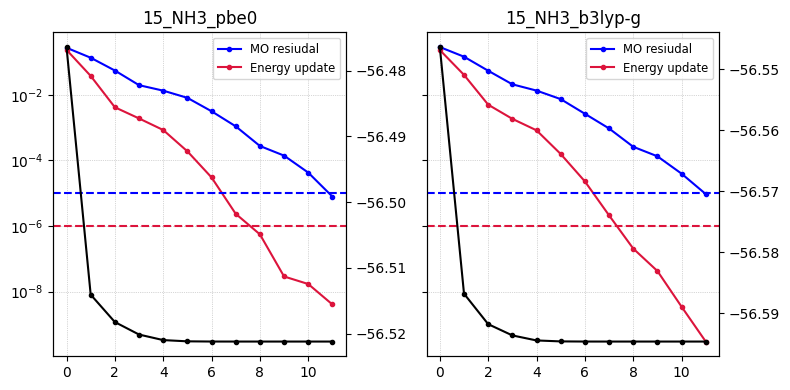

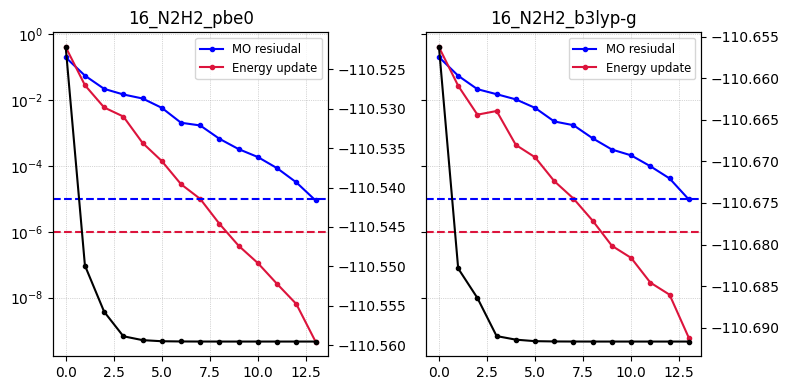

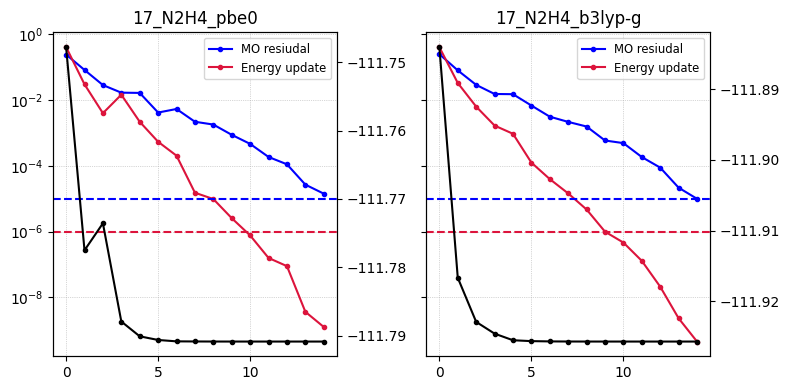

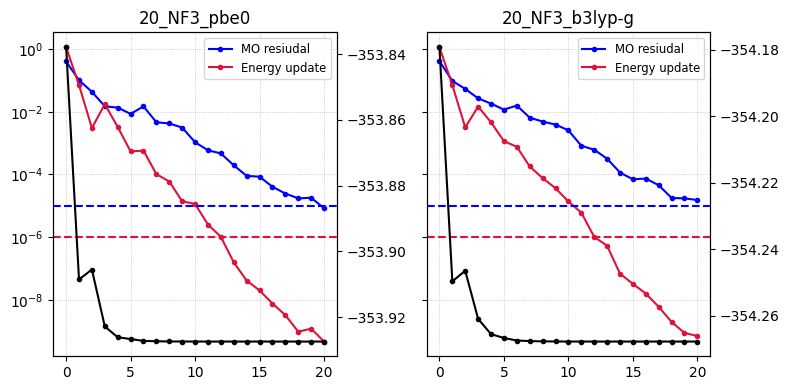

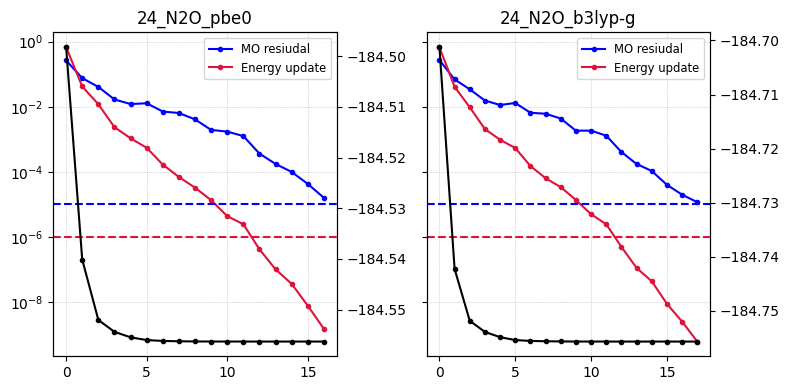

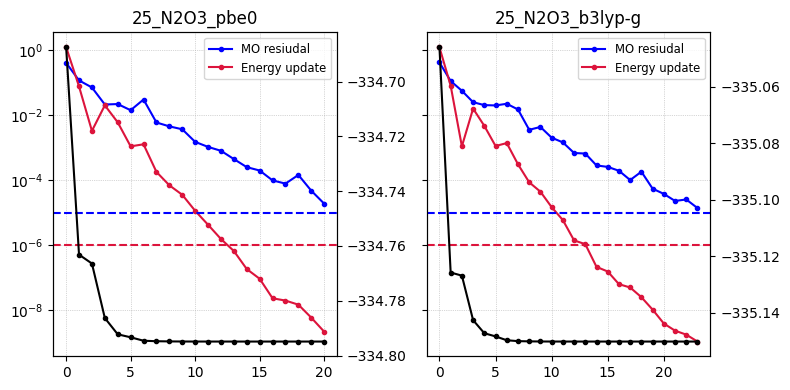

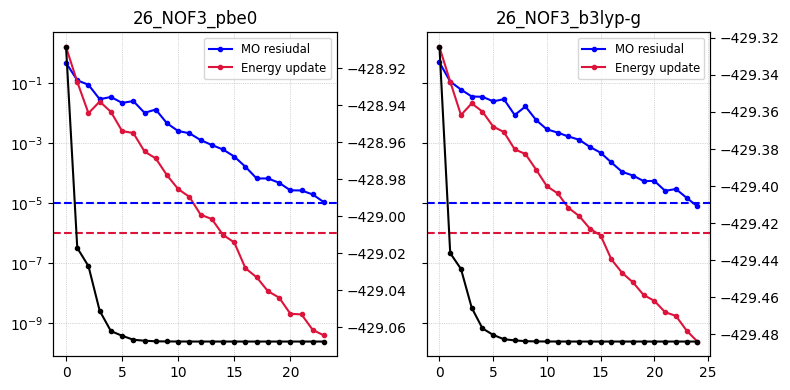

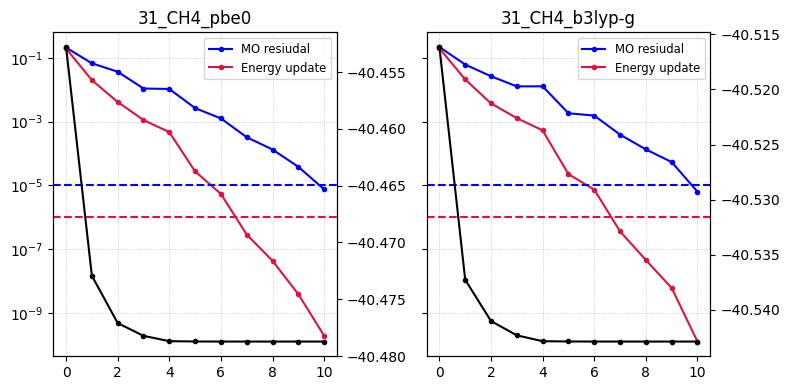

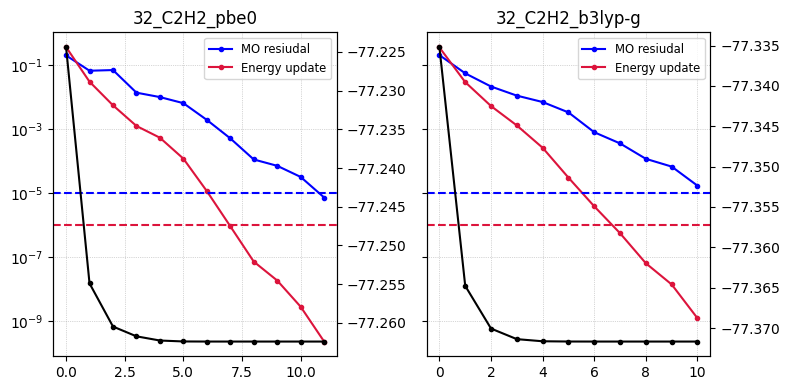

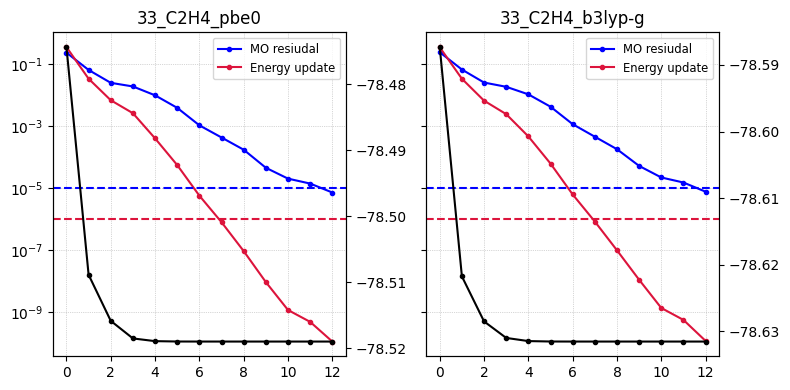

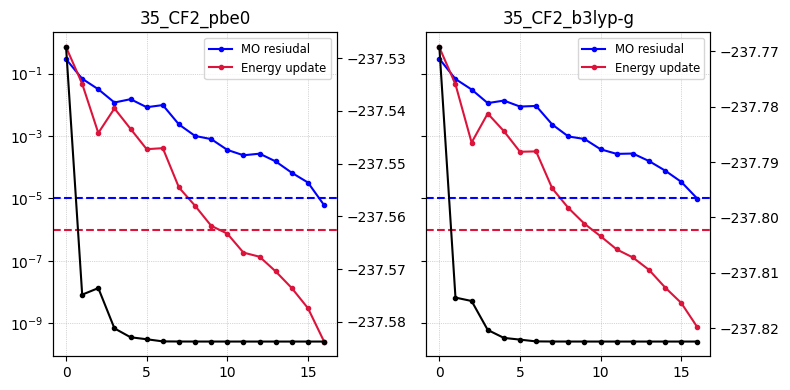

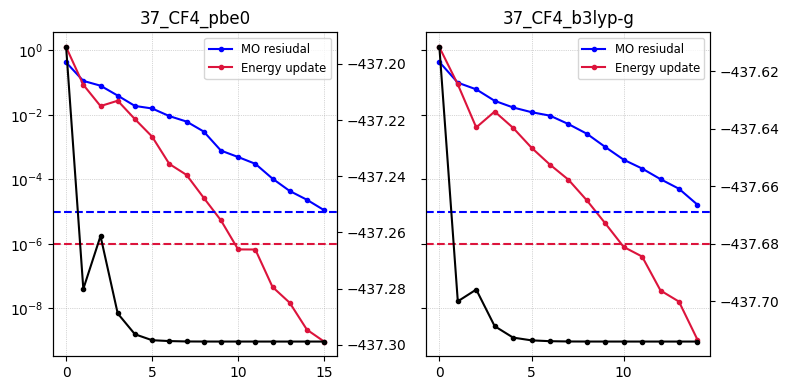

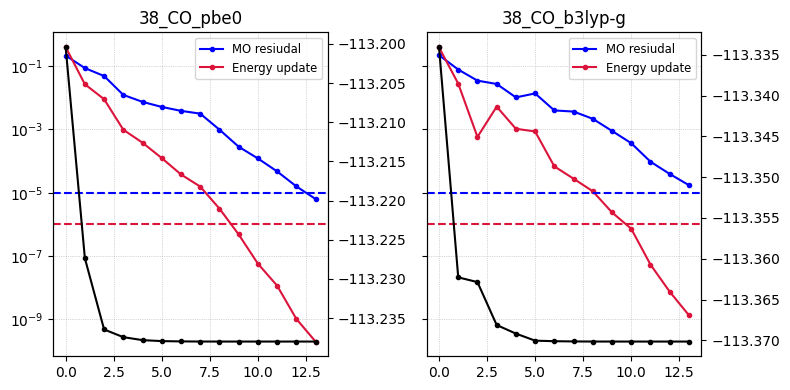

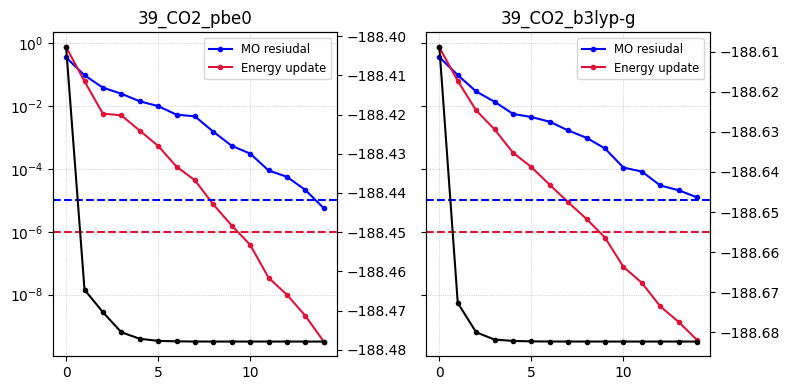

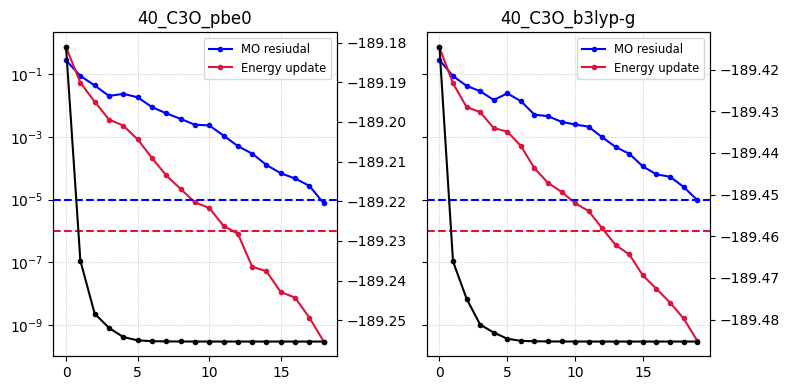

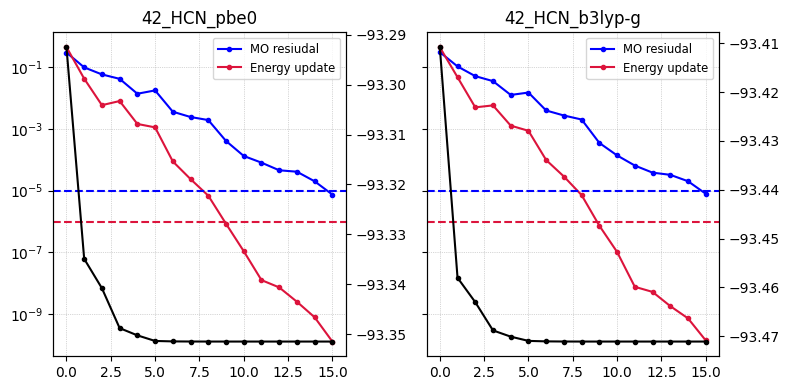

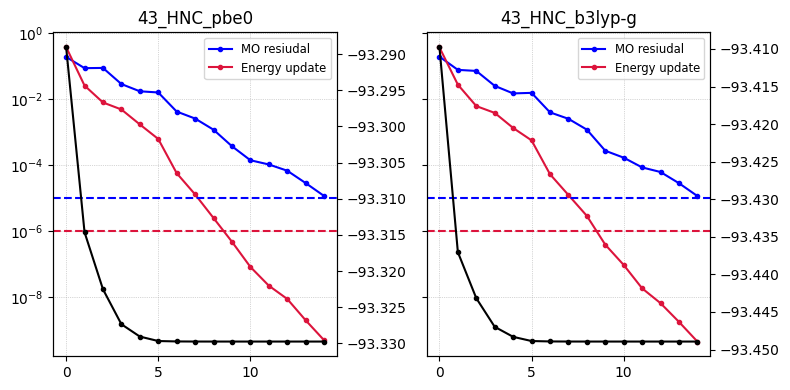

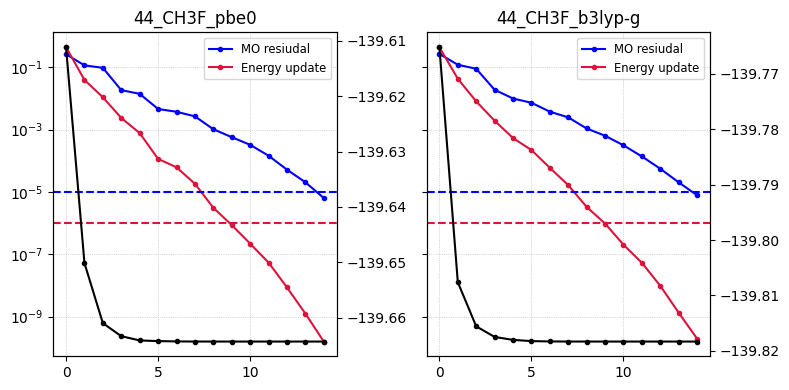

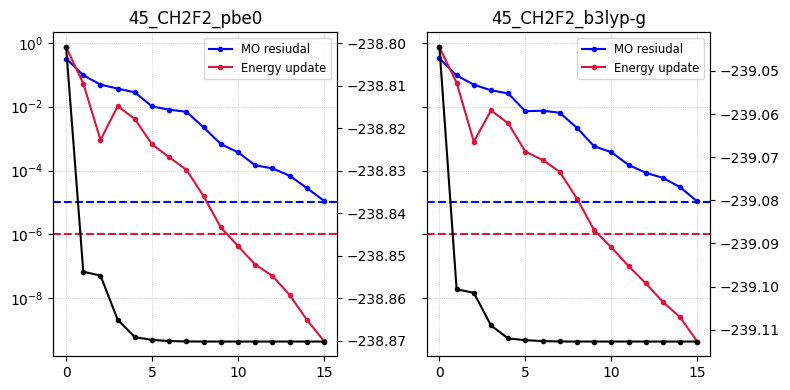

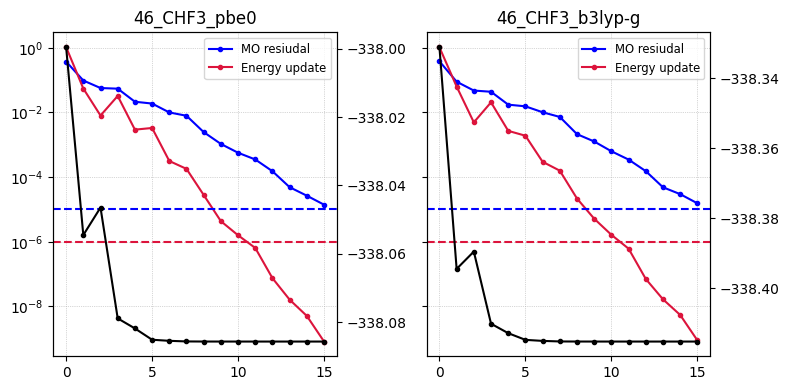

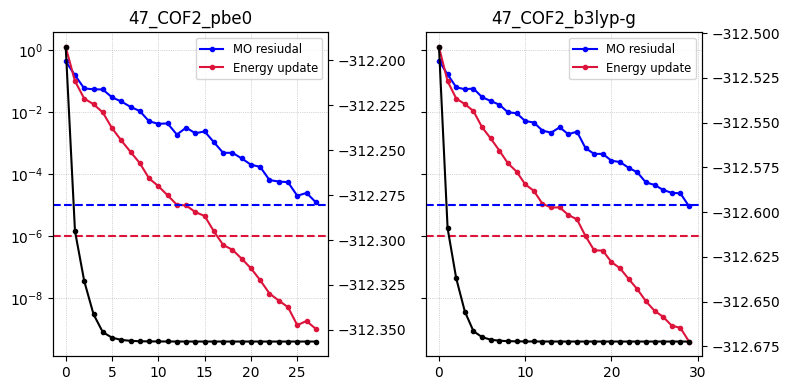

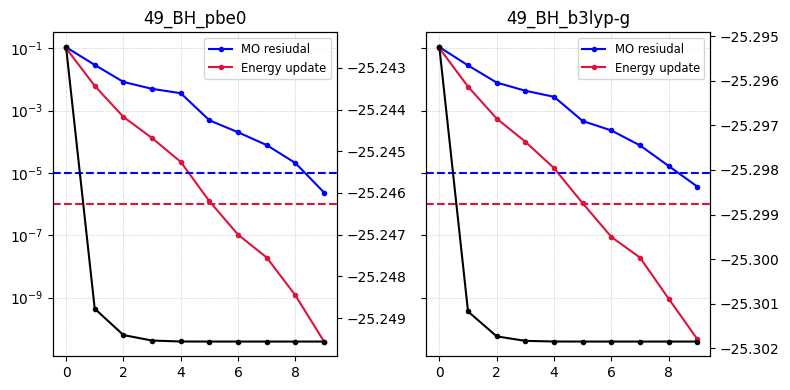

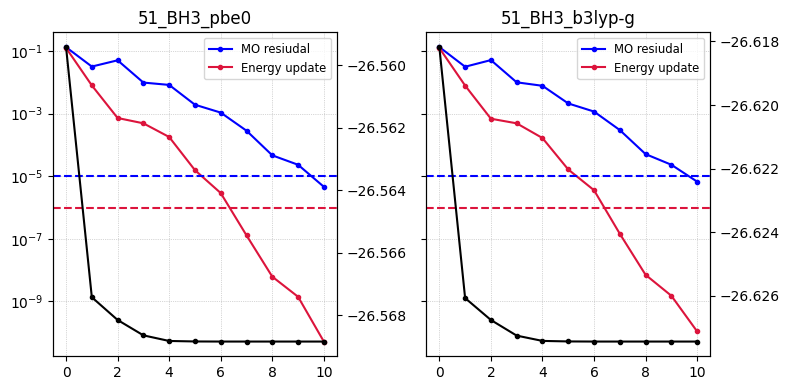

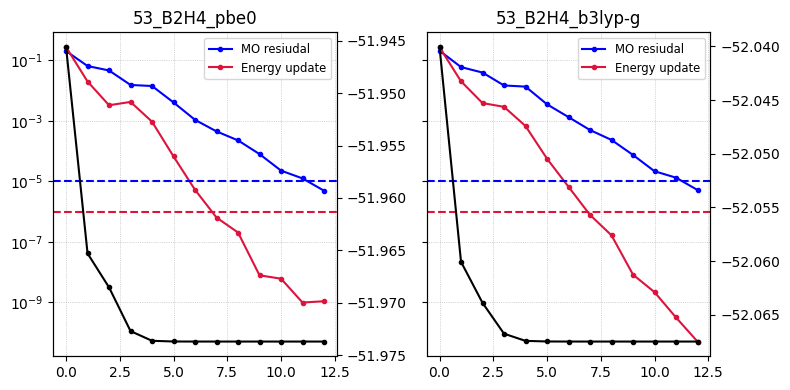

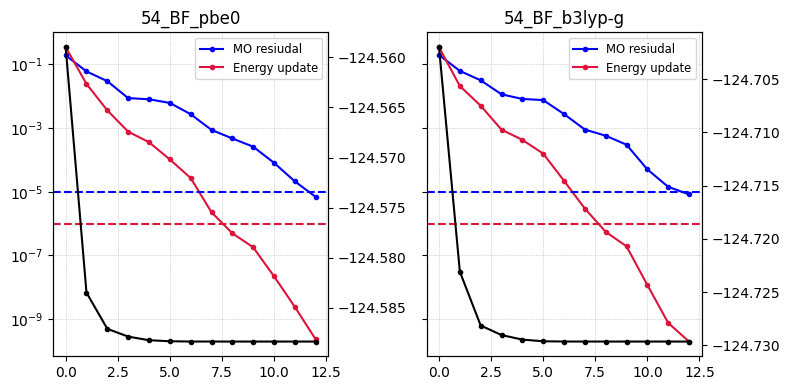

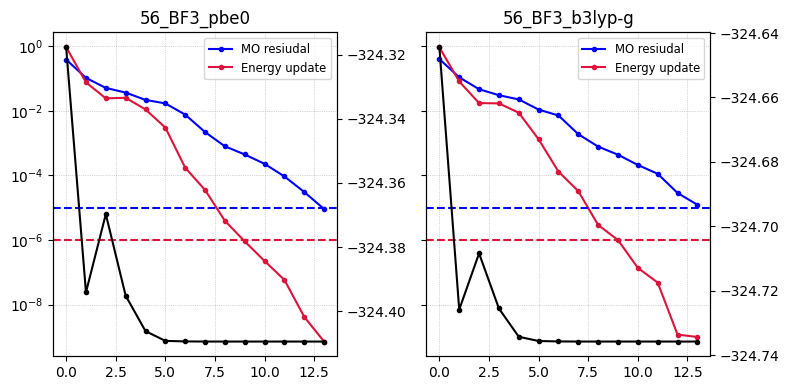

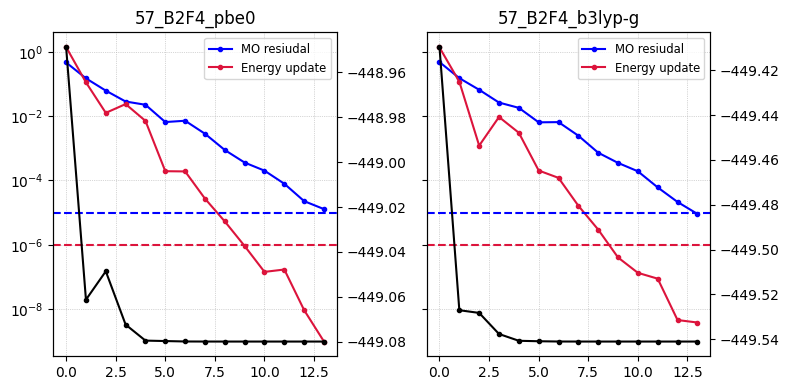

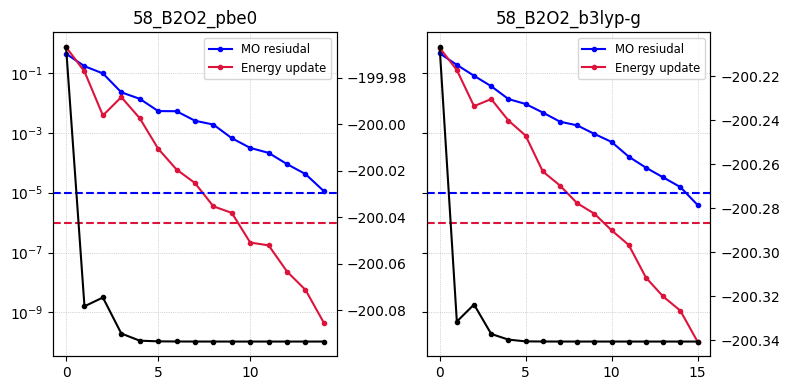

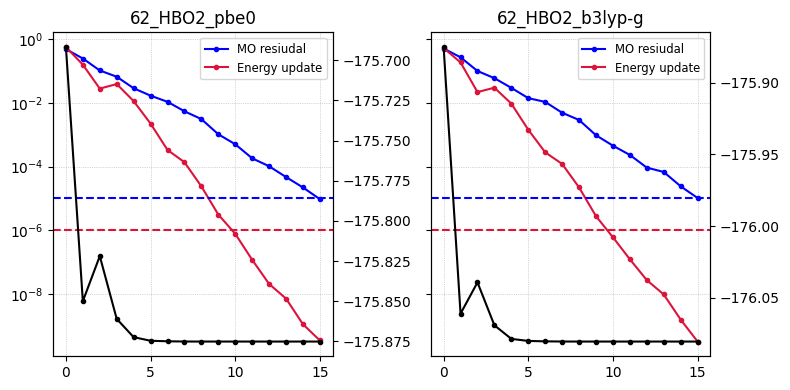

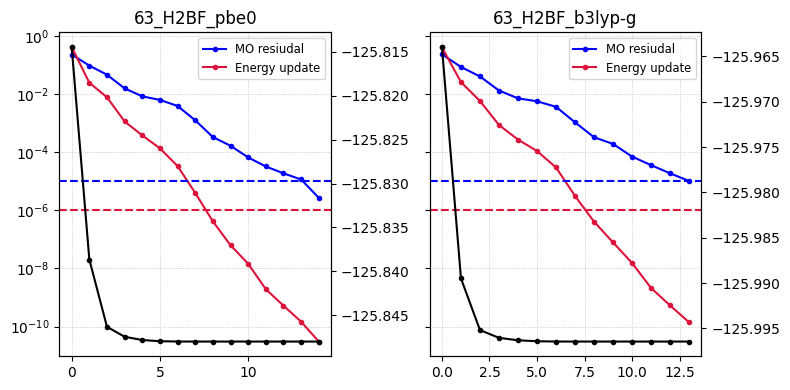

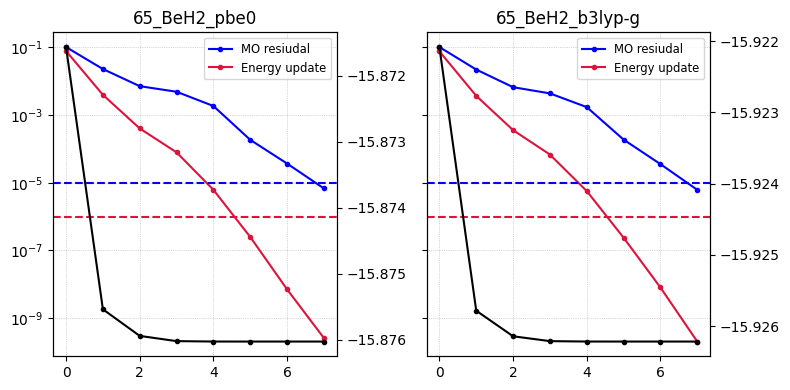

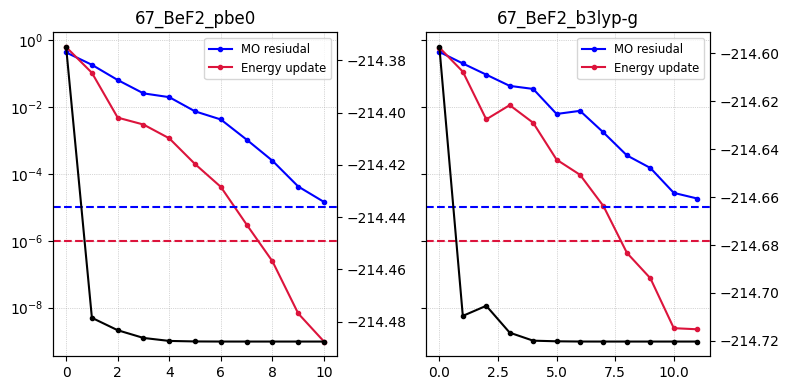

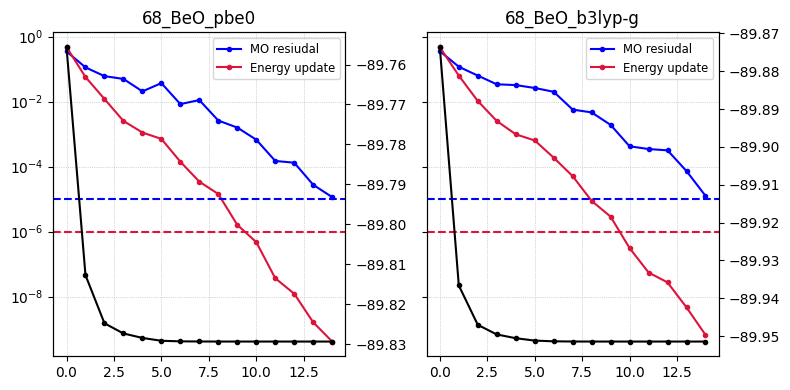

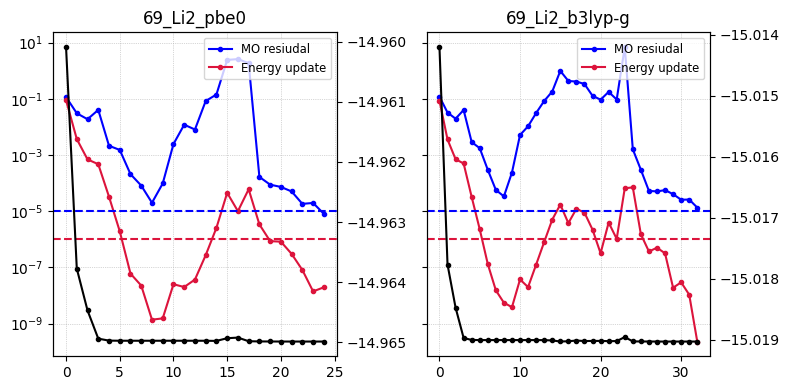

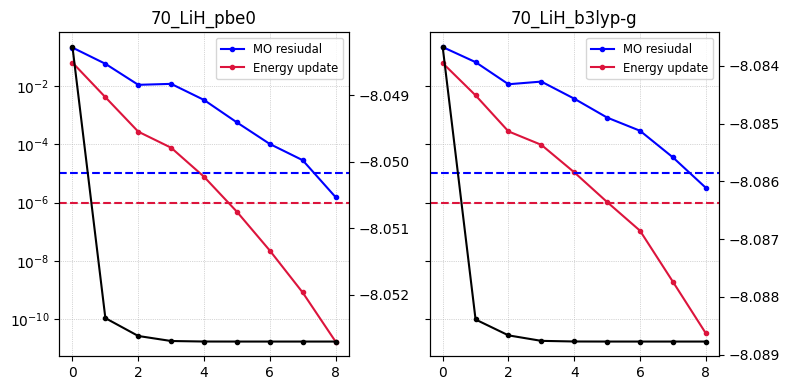

In [ ]:
for mol in molecules:
    if getMult(mol) > 1:
        continue
        
    fig, axes = plt.subplots(ncols=2, dpi=100, figsize=(8, 4), sharey=True)
    
    for func, ax in zip(functionals, axes):
        try:
            en, mo, up = zip(*getSCFCycleData(mol, func))
            ax.plot(mo, marker='.', color='blue', label='MO resiudal')
            ax.plot(up, marker='.', color='crimson', label='Energy update')
            
            ax2 = ax.twinx()
            ax2.plot(en, marker='.', color='black')
            ax2.ticklabel_format(useOffset=False)
            
            mo_thrs, up_thrs = getThresholds(mol, func)
            ax.axhline(mo_thrs, ls='--', color='blue')
            ax.axhline(up_thrs, ls='--', color='crimson')
            
            ax.set_title(f'{mol}_{getMolname(mol)}_{func}')
            ax.grid(ls=':', lw=0.5)
            ax.set_yscale('log')

            ax.legend(fontsize='small', loc='upper right')
            
            plt.tight_layout(h_pad=1)
            plt.savefig(f'convergence_plots/{mol}_{getMolname(mol)}.png', facecolor='white')
            
        except Exception as e:
            print(f'Skipped', mol, getMolname(mol), func)
            print(format_exc())
            print('')
            continue